In [82]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [83]:
housing_data=pd.read_csv(r"C:\Users\91771\Downloads\ProjectonPropertyPricePrediction\Dataset\HousePrices.csv")
housing_data

,Id,Dwell_Type,Zone_Class,LotFrontage,LotArea,Road_Type,Alley,Property_Shape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Property_Sale_Price
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2068,942,60,RL,NaN,8755,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,6,2009,WD,Normal,214000
2069,943,90,RL,63.0,7711,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,Oth,Abnorml,150000
2070,944,90,RL,313.0,25000,Pave,NaN,Reg,Low,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,143000
2071,945,20,RL,52.0,14375,Pave,NaN,IR1,Lvl,NoSeWa,...,0,NaN,NaN,NaN,0,1,2009,COD,Abnorml,137500


In [84]:
housing_data.shape

(2073, 81)

In [85]:
housing_data.columns

Index(['Id', 'Dwell_Type', 'Zone_Class', 'LotFrontage', 'LotArea', 'Road_Type',
       'Alley', 'Property_Shape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'Dwelling_Type', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCo

In [86]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2073 entries, 0 to 2072
Data columns (total 81 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2073 non-null   int64  
 1   Dwell_Type           2073 non-null   int64  
 2   Zone_Class           2073 non-null   object 
 3   LotFrontage          1753 non-null   float64
 4   LotArea              2073 non-null   int64  
 5   Road_Type            2073 non-null   object 
 6   Alley                129 non-null    object 
 7   Property_Shape       2073 non-null   object 
 8   LandContour          2073 non-null   object 
 9   Utilities            2073 non-null   object 
 10  LotConfig            2073 non-null   object 
 11  LandSlope            2073 non-null   object 
 12  Neighborhood         2073 non-null   object 
 13  Condition1           2073 non-null   object 
 14  Condition2           2073 non-null   object 
 15  Dwelling_Type        2073 non-null   o

In [87]:
class Data_Auditor:
    def NA_in_Data(data_frame):
        result = (data_frame.isnull().sum().sum()) / (data_frame.shape[0] * data_frame.shape[1]) * 100
        return(print("Data has",round(result,2),"% NA's"))
    
    def Remove_Columns(data_frame,*args):
        list_of_cols = list(args)
        data_frame.drop(list_of_cols,axis = 1,inplace = True)
        
    def NA_in_Columns(data_frame):
        total_missing = data_frame.isnull().sum().sort_values(ascending=False)
        percent_missing = round(((housing_data.isnull().sum()/housing_data.isnull().count()).sort_values(ascending=False)*100),1)
        missing_data = pd.concat([total_missing, percent_missing], axis=1, keys=['Missing_Obs', 'Percent_of_NA'])
        return(missing_data.head(10))
        
    def Most_Frequent_Data(Data_frame,Column):
        Count = Data_frame[Column].value_counts()
        Percentage = round(((Data_frame[Column].value_counts()/Data_frame.shape[0])*100),2)
        Summary_data = pd.concat([Count, Percentage], axis=1, keys=['Count','Percentage'])
        return(Summary_data)

In [88]:
Data_Auditor.NA_in_Data(housing_data) #There are a lot of NA's we need to investigate further
Data_Auditor.NA_in_Columns(housing_data)

Data has 5.88 % NA's


,Missing_Obs,Percent_of_NA
PoolQC,2065,99.6
MiscFeature,1993,96.1
Alley,1944,93.8
Fence,1669,80.5
FireplaceQu,988,47.7
LotFrontage,320,15.4
GarageCond,113,5.5
GarageType,113,5.5
GarageYrBlt,113,5.5
GarageFinish,113,5.5


In [89]:
housing_data["PoolQC"] = housing_data["PoolQC"].fillna("No pool")
housing_data["MiscFeature"] = housing_data["MiscFeature"].fillna("No misc feature")
housing_data["Alley"] = housing_data["Alley"].fillna("No alley access")
housing_data["Fence"] = housing_data["Fence"].fillna("No fence")
housing_data["FireplaceQu"] = housing_data["FireplaceQu"].fillna("No fireplace")

In [90]:
Data_Auditor.NA_in_Columns(housing_data)

,Missing_Obs,Percent_of_NA
LotFrontage,320,15.4
GarageYrBlt,113,5.5
GarageCond,113,5.5
GarageType,113,5.5
GarageFinish,113,5.5
GarageQual,113,5.5
BsmtExposure,61,2.9
BsmtFinType2,60,2.9
BsmtFinType1,59,2.8
BsmtCond,59,2.8


In [91]:
housing_data.groupby('Neighborhood')['LotFrontage'].median()

Neighborhood
Blmngtn    46.5
Blueste    24.0
BrDale     21.0
BrkSide    52.0
ClearCr    80.0
CollgCr    70.0
Crawfor    75.0
Edwards    67.0
Gilbert    70.5
IDOTRR     60.0
MeadowV    21.0
Mitchel    75.5
NAmes      73.0
NPkVill    53.0
NWAmes     80.0
NoRidge    89.0
NridgHt    88.5
OldTown    60.0
SWISU      60.0
Sawyer     71.0
SawyerW    67.0
Somerst    74.5
StoneBr    47.0
Timber     80.0
Veenker    60.0
Name: LotFrontage, dtype: float64

In [92]:
housing_data['LotFrontage'] = housing_data['LotFrontage'].fillna(housing_data.groupby('Neighborhood')['LotFrontage'].transform('median'))
housing_data['LotFrontage']

0        65.0
1        80.0
2        68.0
3        60.0
4        84.0
        ...  
2068     70.5
2069     63.0
2070    313.0
2071     52.0
2072     98.0
Name: LotFrontage, Length: 2073, dtype: float64

In [93]:
Garage_cols = [columns for columns in housing_data if columns.startswith('Garage')]

for columns in Garage_cols:
    if housing_data[columns].dtypes == 'float64':
        housing_data[columns] = 0
    else:
        housing_data[columns] = 'No_Garage'

del Garage_cols 

In [94]:
Basement_cols_data = housing_data.loc[:,housing_data.columns.str.contains("Basement")]
Basement_cols_data_2 = housing_data.loc[:,housing_data.columns.str.contains("Bsmt")]
Basement_cols_data_3 = housing_data['BsmtExposure']
Basement = pd.concat([Basement_cols_data, Basement_cols_data_2, Basement_cols_data_3], axis=1)

In [95]:
del Basement_cols_data
del Basement_cols_data_2
del Basement_cols_data_3

In [96]:
for columns in Basement.columns:
    if housing_data[columns].dtypes == 'float64':
        housing_data[columns] = housing_data[columns].fillna(0)
    else:
        housing_data[columns] = housing_data[columns].fillna('No_Basement')

del Basement      
del columns

In [97]:
housing_data["MasVnrType"] = housing_data["MasVnrType"].fillna("None")
housing_data["MasVnrArea"] = housing_data["MasVnrArea"].fillna(0)

In [98]:
Data_Auditor.Most_Frequent_Data(housing_data,'Zone_Class')

,Count,Percentage
RL,1611,77.71
RM,324,15.63
FV,102,4.92
RH,22,1.06
C (all),14,0.68


In [99]:
housing_data['Zone_Class'] = housing_data['Zone_Class'].fillna(housing_data['Zone_Class'].mode()[0])

In [100]:
Data_Auditor.Remove_Columns(housing_data,'Utilities')

In [101]:
Data_Auditor.Most_Frequent_Data(housing_data,'BsmtFullBath')
housing_data['BsmtFullBath'] = housing_data['BsmtFullBath'].fillna(housing_data['BsmtFullBath'].mode()[0])

Data_Auditor.Most_Frequent_Data(housing_data,'BsmtHalfBath')
housing_data['BsmtHalfBath'] = housing_data['BsmtHalfBath'].fillna(housing_data['BsmtHalfBath'].mode()[0])

In [102]:
Data_Auditor.Most_Frequent_Data(housing_data,'Functional')
housing_data['Functional'] = housing_data['Functional'].fillna(housing_data['Functional'].mode()[0])
#We have used mode imputation again

#Sale_Type
Data_Auditor.Most_Frequent_Data(housing_data,'SaleType')
housing_data['SaleType'] = housing_data['SaleType'].fillna(housing_data['SaleType'].mode()[0])

#Electrical_System
Data_Auditor.Most_Frequent_Data(housing_data,'Electrical')
housing_data['Electrical'] = housing_data['Electrical'].fillna(housing_data['Electrical'].mode()[0])

#Exterior1st & Exterior2nd
Data_Auditor.Most_Frequent_Data(housing_data,'Exterior1st')
housing_data['Exterior1st'] = housing_data['Exterior1st'].fillna(housing_data['Exterior1st'].mode()[0])

Data_Auditor.Most_Frequent_Data(housing_data,'Exterior2nd')
housing_data['Exterior2nd'] = housing_data['Exterior2nd'].fillna(housing_data['Exterior2nd'].mode()[0])

#Kitchen_Quality
Data_Auditor.Most_Frequent_Data(housing_data,'KitchenQual')
housing_data['KitchenQual'] = housing_data['KitchenQual'].fillna(housing_data['KitchenQual'].mode()[0])


In [103]:
Data_Auditor.NA_in_Data(housing_data)

Data has 0.0 % NA's


In [104]:
Data_Auditor.Remove_Columns(housing_data,'Id')

In [105]:
#Feature Engineering
housing_data['Total_HouseArea_SqFt'] = housing_data['TotalBsmtSF'] + housing_data['1stFlrSF'] + housing_data['2ndFlrSF']

In [106]:
from sklearn.preprocessing import RobustScaler as RBS

scaler = RBS(with_centering=True,with_scaling=True,quantile_range=(5.0, 95.0),copy=True)

for columns in housing_data.columns:
    if housing_data[columns].dtypes!='object':
        housing_data[columns] = scaler.fit_transform(housing_data[columns].values.reshape(-1,1))

In [107]:
a=housing_data.select_dtypes(include=['object']).dtypes.index
a

Index(['Zone_Class', 'Road_Type', 'Alley', 'Property_Shape', 'LandContour',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'Dwelling_Type', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')

In [108]:
#create dummies for categorical data
dummy1 = pd.get_dummies(housing_data[['Zone_Class', 'Road_Type', 'Alley', 'Property_Shape', 'LandContour',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'Dwelling_Type', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']],drop_first=True)

Data_Auditor.Remove_Columns(housing_data,'Zone_Class', 'Road_Type', 'Alley', 'Property_Shape', 'LandContour',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'Dwelling_Type', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'SaleType', 'SaleCondition')

# Adding the results to the master dataframe
housing_data= pd.concat([housing_data,dummy1], axis=1)

In [109]:
housing_data.shape

(2073, 239)

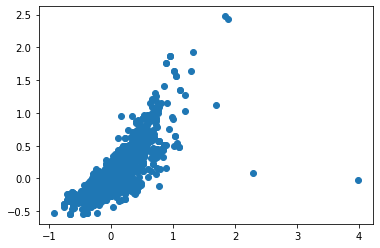

In [110]:
#scatter plot
import matplotlib.pyplot as plt

x = housing_data['Total_HouseArea_SqFt']
y = housing_data['Property_Sale_Price']

plt.scatter(x, y)
plt.show()

In [111]:
housing_data = housing_data[housing_data.Property_Sale_Price < 2]
housing_data = housing_data[housing_data.Total_HouseArea_SqFt < 2]

In [112]:
from sklearn.model_selection import train_test_split as tts

# Putting feature variable to X
X = housing_data.drop('Property_Sale_Price',axis=1)

# Putting response variable to y
y = housing_data['Property_Sale_Price']

# Splitting the data into train and test
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.30, random_state=100)

In [113]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X_train,y_train)
#r_sq = model.score(Input_Train,Output_Train) #R-Square
rfe=RFE(model,20)
rfe=rfe.fit(X_train,y_train)
B0 = model.intercept_
B1_to_Bk = model.coef_

In [114]:
col=X_train.columns[rfe.support_]
col

Index(['Total_HouseArea_SqFt', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_StoneBr', 'Neighborhood_Veenker', 'Condition2_PosA',
       'Condition2_RRAe', 'Dwelling_Type_2fmCon', 'RoofMatl_Membran',
       'Exterior1st_CBlock', 'BsmtExposure_Gd', 'Heating_OthW',
       'KitchenQual_Fa', 'KitchenQual_Gd', 'KitchenQual_TA', 'Functional_Sev',
       'PoolQC_Gd', 'SaleType_Con', 'SaleType_New', 'SaleCondition_Partial'],
      dtype='object')

In [115]:
X_train_lm=X_train[col]
import statsmodels.api as sm
X_train_lm=sm.add_constant(X_train_lm)
lm=sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                             OLS Regression Results                            
Dep. Variable:     Property_Sale_Price   R-squared:                       0.848
Model:                             OLS   Adj. R-squared:                  0.846
Method:                  Least Squares   F-statistic:                     397.0
Date:                 Thu, 18 Mar 2021   Prob (F-statistic):               0.00
Time:                         18:25:38   Log-Likelihood:                 948.43
No. Observations:                 1448   AIC:                            -1855.
Df Residuals:                     1427   BIC:                            -1744.
Df Model:                           20                                         
Covariance Type:             nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const               

In [116]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['Features']=X_train_lm.columns
vif['VIF']=[variance_inflation_factor(X_train_lm.values,i) for i in range(X_train_lm.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif

,Features,VIF
19,SaleType_New,57.42
20,SaleCondition_Partial,57.37
0,const,22.31
15,KitchenQual_TA,6.33
14,KitchenQual_Gd,5.17
13,KitchenQual_Fa,1.63
1,Total_HouseArea_SqFt,1.60
3,Neighborhood_NridgHt,1.32
2,Neighborhood_NoRidge,1.16
11,BsmtExposure_Gd,1.09


In [117]:
X_train_lm=X_train_lm.drop(['SaleCondition_Partial'],axis=1)
X_train_lm.columns

Index(['const', 'Total_HouseArea_SqFt', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_StoneBr', 'Neighborhood_Veenker',
       'Condition2_PosA', 'Condition2_RRAe', 'Dwelling_Type_2fmCon',
       'RoofMatl_Membran', 'Exterior1st_CBlock', 'BsmtExposure_Gd',
       'Heating_OthW', 'KitchenQual_Fa', 'KitchenQual_Gd', 'KitchenQual_TA',
       'Functional_Sev', 'PoolQC_Gd', 'SaleType_Con', 'SaleType_New'],
      dtype='object')

In [118]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['Features']=X_train_lm.columns
vif['VIF']=[variance_inflation_factor(X_train_lm.values,i) for i in range(X_train_lm.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif

,Features,VIF
0,const,22.16
15,KitchenQual_TA,6.30
14,KitchenQual_Gd,5.14
13,KitchenQual_Fa,1.62
1,Total_HouseArea_SqFt,1.60
3,Neighborhood_NridgHt,1.32
19,SaleType_New,1.20
2,Neighborhood_NoRidge,1.16
11,BsmtExposure_Gd,1.08
5,Neighborhood_Veenker,1.07


In [119]:
X_train_lm=X_train_lm.drop(['const'],axis=1)
X_train_lm.columns

Index(['Total_HouseArea_SqFt', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_StoneBr', 'Neighborhood_Veenker', 'Condition2_PosA',
       'Condition2_RRAe', 'Dwelling_Type_2fmCon', 'RoofMatl_Membran',
       'Exterior1st_CBlock', 'BsmtExposure_Gd', 'Heating_OthW',
       'KitchenQual_Fa', 'KitchenQual_Gd', 'KitchenQual_TA', 'Functional_Sev',
       'PoolQC_Gd', 'SaleType_Con', 'SaleType_New'],
      dtype='object')

In [120]:
X_train_lm
import statsmodels.api as sm
X_train_lm=sm.add_constant(X_train_lm)
lm=sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                             OLS Regression Results                            
Dep. Variable:     Property_Sale_Price   R-squared:                       0.847
Model:                             OLS   Adj. R-squared:                  0.845
Method:                  Least Squares   F-statistic:                     415.1
Date:                 Thu, 18 Mar 2021   Prob (F-statistic):               0.00
Time:                         18:25:38   Log-Likelihood:                 943.93
No. Observations:                 1448   AIC:                            -1848.
Df Residuals:                     1428   BIC:                            -1742.
Df Model:                           19                                         
Covariance Type:             nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 

In [122]:
X_train_lm=X_train_lm.drop(['Condition2_PosA','RoofMatl_Membran','Exterior1st_CBlock','Heating_OthW','Condition2_RRAe','Functional_Sev','SaleType_Con'],axis=1)
X_train_lm.columns

Index(['const', 'Total_HouseArea_SqFt', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_StoneBr', 'Neighborhood_Veenker',
       'Dwelling_Type_2fmCon', 'BsmtExposure_Gd', 'KitchenQual_Fa',
       'KitchenQual_Gd', 'KitchenQual_TA', 'PoolQC_Gd', 'SaleType_New'],
      dtype='object')

In [123]:
X_train_lm
import statsmodels.api as sm
X_train_lm=sm.add_constant(X_train_lm)
lm=sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                             OLS Regression Results                            
Dep. Variable:     Property_Sale_Price   R-squared:                       0.844
Model:                             OLS   Adj. R-squared:                  0.843
Method:                  Least Squares   F-statistic:                     648.2
Date:                 Thu, 18 Mar 2021   Prob (F-statistic):               0.00
Time:                         18:28:39   Log-Likelihood:                 932.37
No. Observations:                 1448   AIC:                            -1839.
Df Residuals:                     1435   BIC:                            -1770.
Df Model:                           12                                         
Covariance Type:             nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 

In [124]:
y_train_pred=lm.predict(X_train_lm)
y_train_pred

1355    0.059768
398    -0.155463
157     0.451618
108    -0.144267
222    -0.100513
          ...   
350     0.851176
1934   -0.106081
79     -0.244544
1863   -0.221305
1548    0.022332
Length: 1448, dtype: float64

<AxesSubplot:ylabel='Density'>

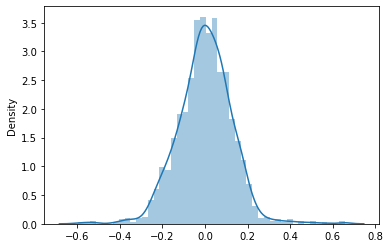

In [126]:
#check the data is normal distribution
res=y_train-y_train_pred
sns.distplot(res)

In [127]:
X_test=housing_data.drop('Property_Sale_Price',axis=1)
y_test=housing_data['Property_Sale_Price']


In [130]:
list_of_cols=list(X_train_lm.columns)[1:]
list_of_cols

['Total_HouseArea_SqFt',
 'Neighborhood_NoRidge',
 'Neighborhood_NridgHt',
 'Neighborhood_StoneBr',
 'Neighborhood_Veenker',
 'Dwelling_Type_2fmCon',
 'BsmtExposure_Gd',
 'KitchenQual_Fa',
 'KitchenQual_Gd',
 'KitchenQual_TA',
 'PoolQC_Gd',
 'SaleType_New']

In [131]:
X_test=X_test[list_of_cols]
X_test_sm=sm.add_constant(X_test)
X_test_sm.head()

,const,Total_HouseArea_SqFt,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_StoneBr,Neighborhood_Veenker,Dwelling_Type_2fmCon,BsmtExposure_Gd,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,PoolQC_Gd,SaleType_New
0,1.0,0.039076,0,0,0,0,0,0,0,1,0,0,0
1,1.0,0.021041,0,0,0,1,0,1,0,0,1,0,0
2,1.0,0.099193,0,0,0,0,0,0,0,1,0,0,0
3,1.0,-0.000859,0,0,0,0,0,0,0,1,0,0,0
4,1.0,0.372724,1,0,0,0,0,0,0,1,0,0,0


In [132]:
lm=sm.OLS(y_test,X_test_sm).fit()
y_pred_test=lm.predict(X_test_sm)
y_pred_test

0       0.079386
1       0.257234
2       0.112765
3       0.057214
4       0.484240
          ...   
2068    0.195257
2069    0.180983
2070    0.134053
2071   -0.016696
2072    0.032249
Length: 2069, dtype: float64

In [133]:
from sklearn.metrics import r2_score
r2_score(y_true=y_test,y_pred=y_pred_test)

0.8292232830943997

In [134]:

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_pred_test))

0.8442442502109366
0.8292232830943997


In [ ]:
#The R-square of test data is 0.8292232830943997 which is 0.2% less than training data (i.e more accurate to be considered)